In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [2]:
sys.path.insert(0, '../src/py-oeis/')

In [9]:
import oeis.etl.extract as extract
import oeis.etl.features as feats
import oeis.viz.plotting as plotting

In [4]:
features = extract.load_features()

# Univariate Analysis

This section contains univariate analyses of the features generated on the integer sequences. 
These features are:

In [7]:
for f in feats.feature_list: print('{0:<20}{1}'.format(f.__name__, f.__doc__))

monotonic_inc       Proportion of the sequence that is weakly monotonically increasing.
concave_up          Proportion of the sequence whose differences of differences are increasing.
nonneg              Proportion of the sequence that is non-negative.
uniq                Number of unique values in the sequence.
length              Length of the sequence.
logmax              Log of the largest magnitude of all the values in the sequence (plus one).
pct_div2            Proportion of the sequence that is divisible by 2 (i.e. even).
pct_div3            Proportion of the sequence that is divisible by 3.


### Descriptive Stats

In [8]:
features.describe()

,concave_up,length,logmax,monotonic_inc,nonneg,pct_div2,pct_div3,uniq
count,314580.000000,314701.000000,314701.000000,314692.000000,314701.000000,314701.000000,314701.000000,314701.000000
mean,0.761431,42.165945,10.019568,0.865226,0.979401,0.512920,0.362904,28.118115
std,0.212075,27.845475,12.078406,0.203138,0.098722,0.302083,0.242189,17.929761
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.560000,19.000000,2.409933,0.692308,1.000000,0.350649,0.227273,14.000000
50%,0.734375,36.000000,5.370045,1.000000,1.000000,0.500000,0.333333,24.000000
75%,1.000000,59.000000,14.545476,1.000000,1.000000,0.727273,0.464646,41.000000
max,1.000000,377.000000,284.670750,1.000000,1.000000,1.000000,1.000000,160.000000


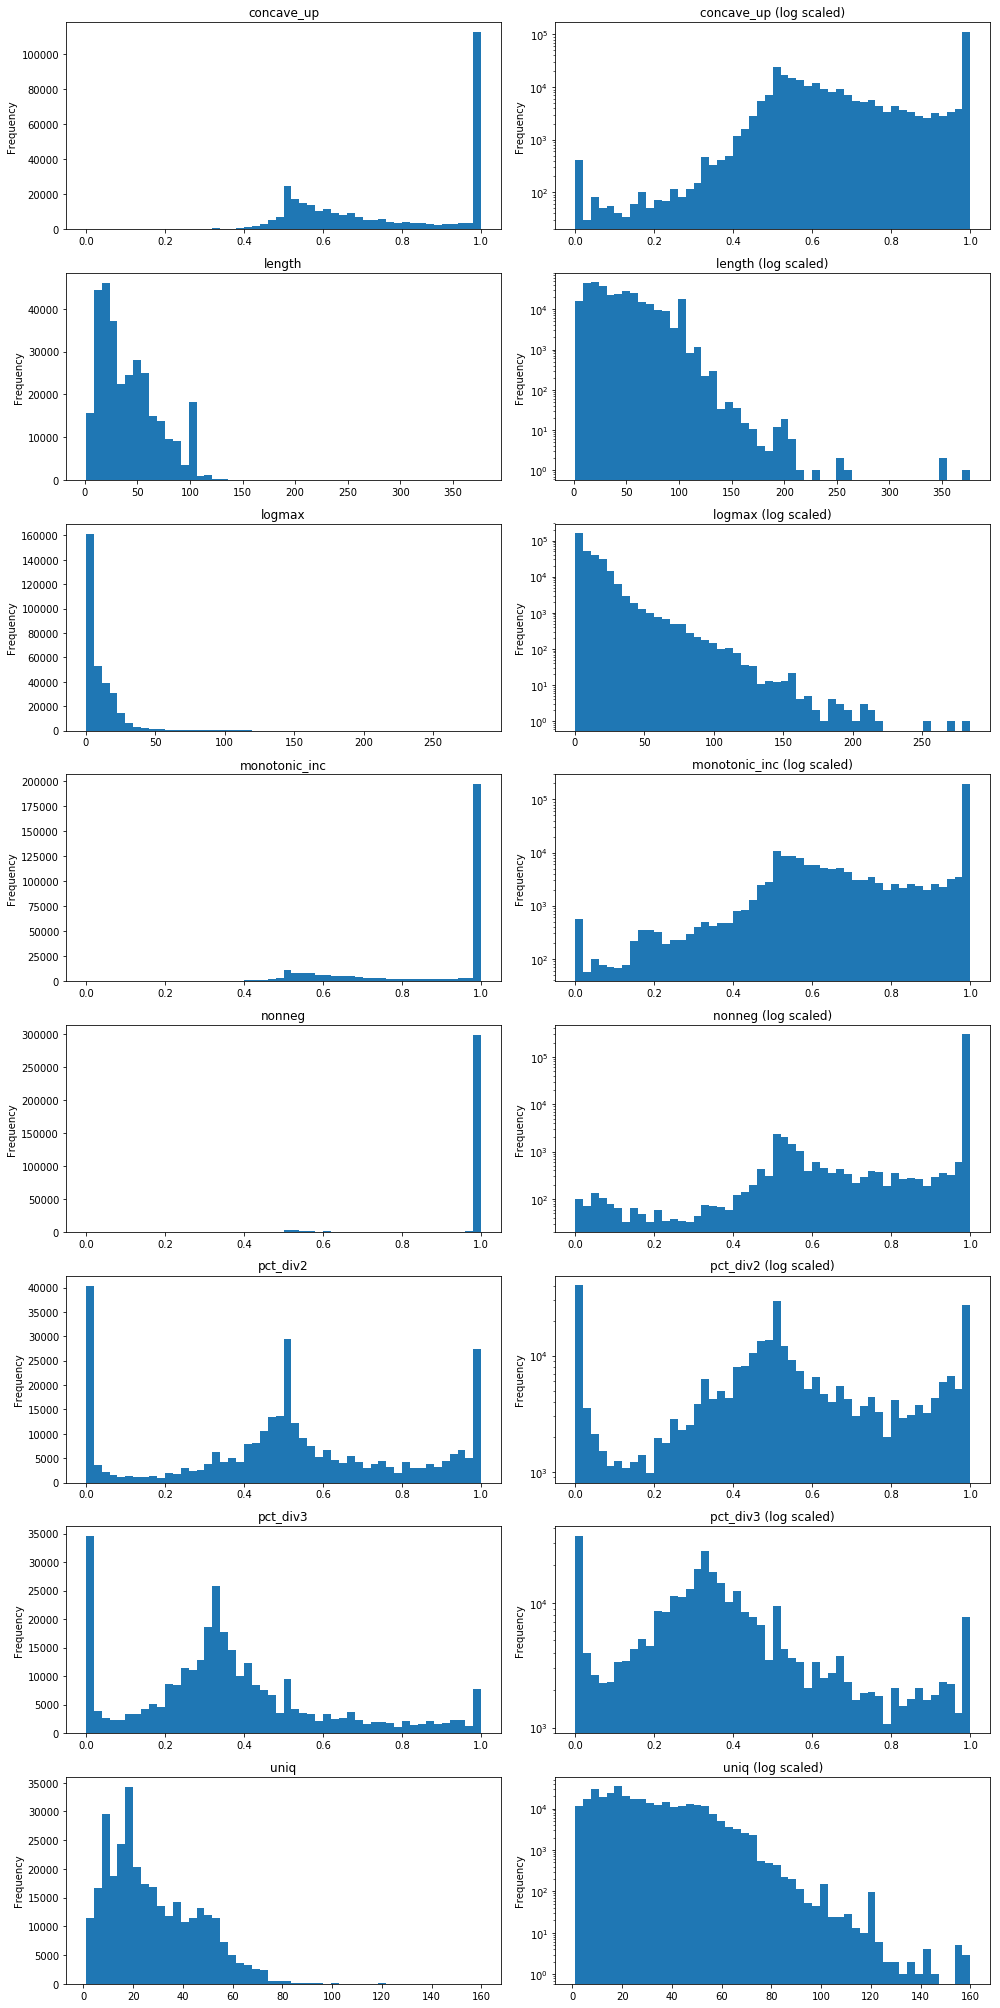

In [11]:
plotting.plot_hists_diff_scales(features)
plt.tight_layout()

### What is that spike in sequences with exactly 10 unique values?

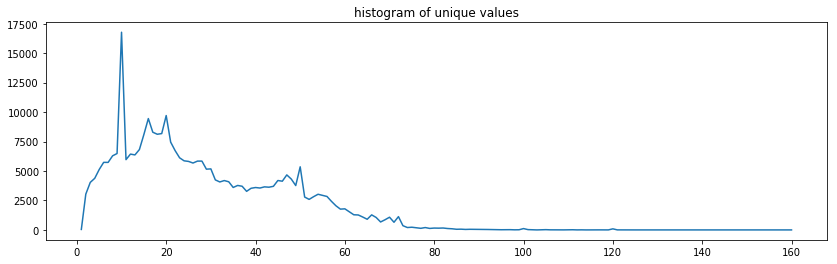

In [12]:
features.uniq.value_counts().sort_index().plot(figsize=(14,4), title='histogram of unique values');

Likely, these are decimal representations of numbers. A better way select the sequences that likely correspond to decimal representations is to select those sequences whose:
* maximum value is less than or equal to 9 (i.e. logmax <= 1).
* is a non-negative sequence.

Here are a number of observations about the variables of these likely decimal representations:
* concave_up: most commonly, this variable is concentrated around 0.5.
* length: concentrated near 100 -- likely just a round number up which to compute the decimal representation.
* monotonic_inc: this variable is concentrated around 0.5 -- and otherwise skewed toward 1.0. The decimal representations have randomly distributed ups and downs?
* pct_div2: sequences tend to have an even mix of even/odd values.
* pct_div3: sequences tend to have ~1/3 of it's values divisible by 3.

In [13]:
poss_dec = (
    features.loc[
        (features.logmax <= 1.0) & 
        (features.nonneg == 1.0) & 
        (features.uniq == 10)
    ].drop(['nonneg', 'uniq', 'logmax'], axis=1)
)

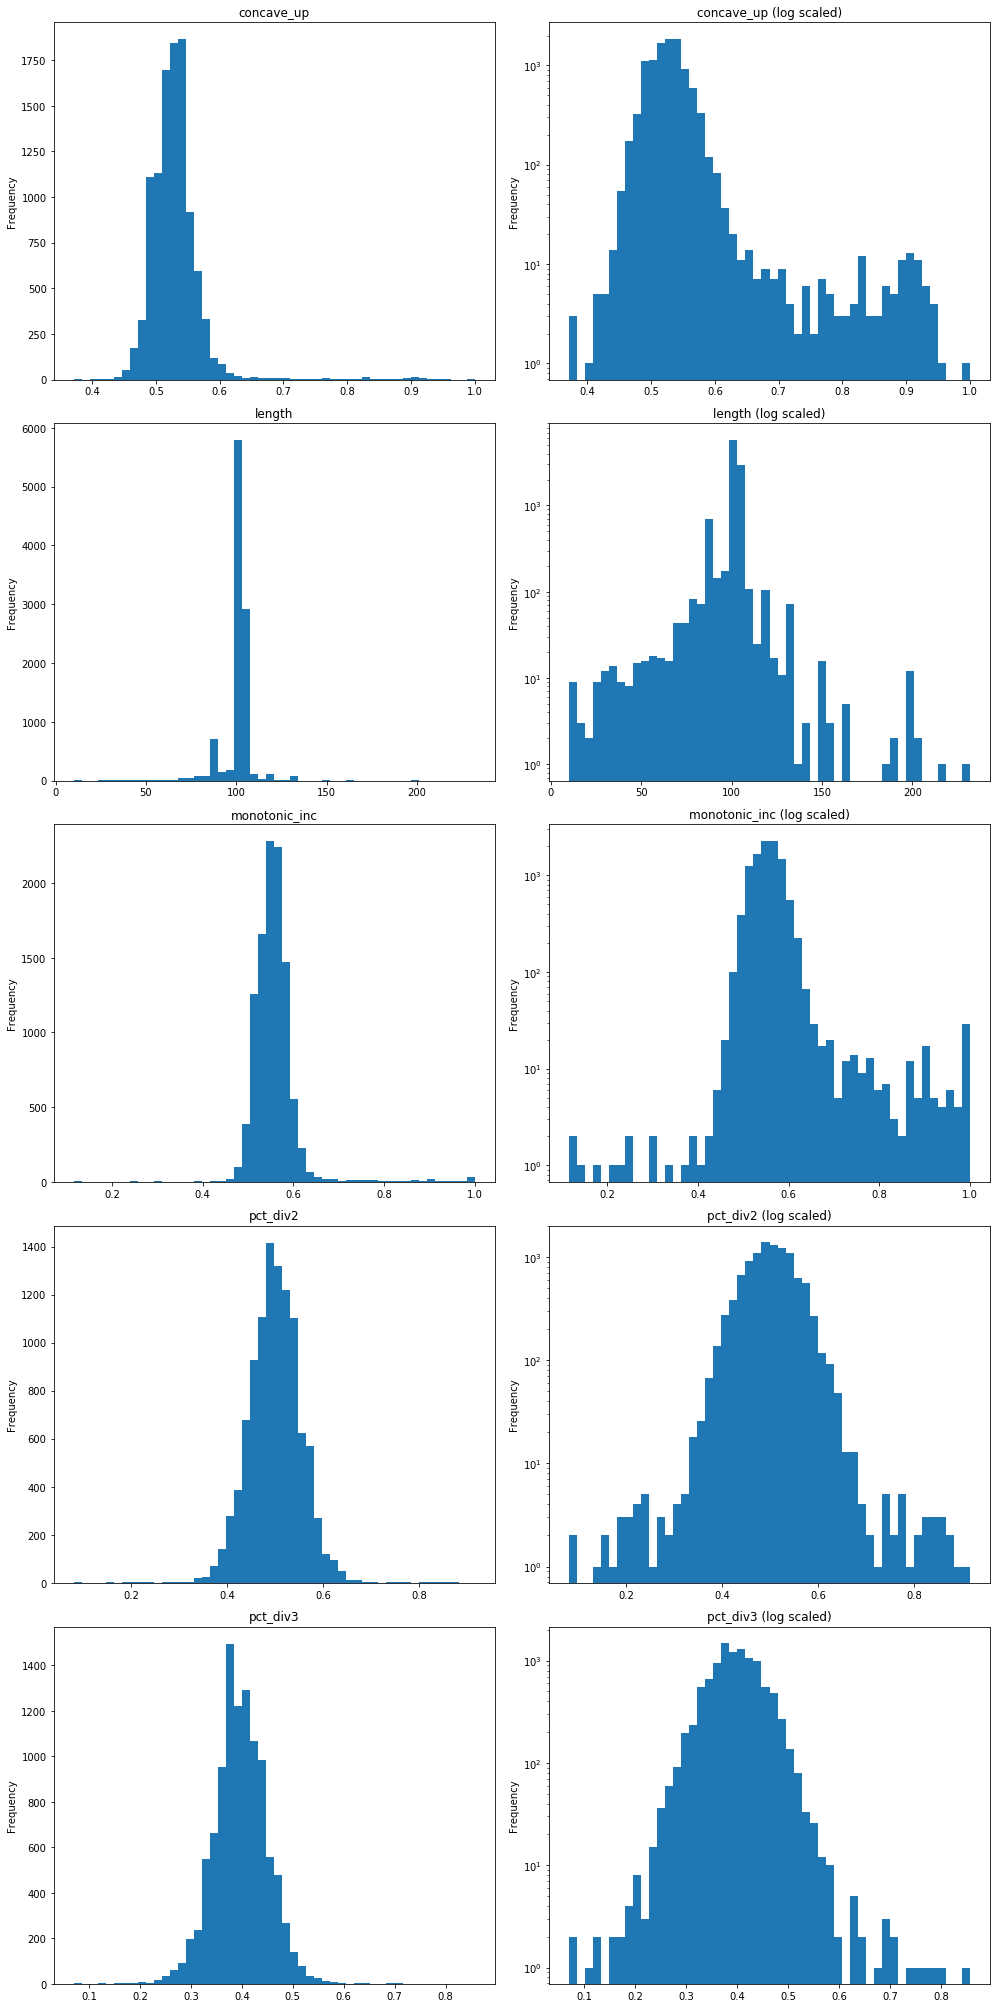

In [14]:
plotting.plot_hists_diff_scales(poss_dec)
plt.tight_layout()

Of the sequences that are likely decimal representations of numbers, the digit-frequency seems to be a distribution centered about 0.1 (sequences with a "random" mix of digits).

In [17]:
seqs = extract.load_sequences()
cnt_vals = lambda seq: pd.Series(seqs[seq]).value_counts().reindex(index=range(10), fill_value=0).rename(seq)
dec_cnts = pd.concat([cnt_vals(seq) for seq in poss_dec.index], axis=1).T

In [18]:
dec_pcts = dec_cnts.apply(lambda x:x/x.sum(), axis=1)

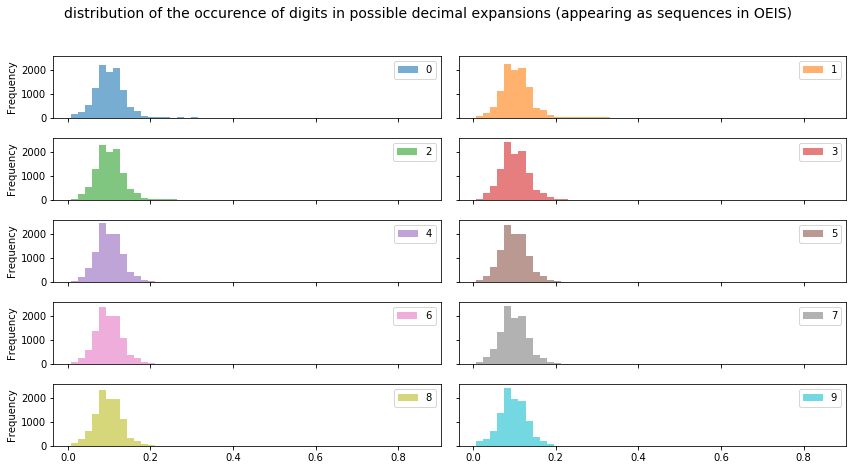

In [19]:
title = 'distribution of the occurence of digits in possible decimal expansions (appearing as sequences in OEIS)'
plotting.plot_hists_same_scale(dec_pcts, title=title)
plt.tight_layout()
plt.show()